In [7]:
# first analysis of the csv file

# import the X library as Y — for conciseness
import pandas as pd
import numpy as np
import math

import statistics as stat
from scipy import stats
import matplotlib.pyplot as plt



# assign the document with the data to df 
# it "brings" the document to be used on the notebook
df = pd.read_csv('mtl.csv',  na_values = 'NaN') # na_values identifies the null values on the csv file
# and how they are represented as (this case as 'NaN')

# displays the first 5 rows of the dataset
df.head()


,subject,sex,ethnic,educ,e4grp,age,mmse,ham_d,ham_a,dig_sym,...,met_minwk,ipa_qgrp,aca1,aca23dg,ae_cort,a_fusi_cort,a_ph_cort,a_pe_cort,asubic,total
0,9690,M,Caucasian,14,Non-E4,66,30,4.0,9.0,57.0,...,777.0,Low,2.25275,3.36390,2.63580,2.78055,2.46110,2.61820,2.58200,2.67061
1,9722,M,Other,20,E4,71,29,8.0,4.0,47.0,...,1039.8,Low,2.08825,2.91600,2.77730,2.49820,3.13505,2.56485,1.99050,2.56716
2,9735,F,Caucasian,14,Non-E4,66,30,2.0,0.0,60.0,...,795.0,Low,2.20960,3.15045,2.40835,2.76160,3.17635,3.28765,1.88995,2.69771
3,9787,F,Caucasian,14,Non-E4,63,29,0.0,9.0,64.0,...,2400.0,High,1.82060,2.86030,2.30295,2.48635,2.69160,2.37405,1.85835,2.34203
4,10010,F,Caucasian,18,E4,71,30,0.0,1.0,94.0,...,2358.0,High,1.96900,3.06670,2.73345,2.62700,2.56170,2.49755,2.15130,2.51524


In [4]:
# cleaning the data

# code based on SSS' 13 session
# .dropna is a function that excludes the rows that contain 
# a null value from the chosen subset
# here I cleaned all the variables I will use
# even if some of them do not have null rows, I gurantee I am
# using a full cleaned dataset and do not need to exhaustively check each rows
df = df.dropna(subset = ['ham_a'])
df = df.dropna(subset = ['met_minwk'])
df = df.dropna(subset = ['ipa_qgrp'])

        
# displays the first 5 rows of the dataset
df.head()

,subject,sex,ethnic,educ,e4grp,age,mmse,ham_d,ham_a,dig_sym,...,met_minwk,ipa_qgrp,aca1,aca23dg,ae_cort,a_fusi_cort,a_ph_cort,a_pe_cort,asubic,total
0,9690,M,Caucasian,14,Non-E4,66,30,4.0,9.0,57.0,...,777.0,Low,2.25275,3.36390,2.63580,2.78055,2.46110,2.61820,2.58200,2.67061
1,9722,M,Other,20,E4,71,29,8.0,4.0,47.0,...,1039.8,Low,2.08825,2.91600,2.77730,2.49820,3.13505,2.56485,1.99050,2.56716
2,9735,F,Caucasian,14,Non-E4,66,30,2.0,0.0,60.0,...,795.0,Low,2.20960,3.15045,2.40835,2.76160,3.17635,3.28765,1.88995,2.69771
3,9787,F,Caucasian,14,Non-E4,63,29,0.0,9.0,64.0,...,2400.0,High,1.82060,2.86030,2.30295,2.48635,2.69160,2.37405,1.85835,2.34203
4,10010,F,Caucasian,18,E4,71,30,0.0,1.0,94.0,...,2358.0,High,1.96900,3.06670,2.73345,2.62700,2.56170,2.49755,2.15130,2.51524


In [8]:
        
# to get descriptive stats informations

# code based on SSS' 13 session
# .describe() function shows 8 descriptive stats informations

anx_describe = df['ham_a'].describe() # for anxiety levels
act_describe = df['met_minwk'].describe() # for metabolic units
print(anx_describe)
print(act_describe)


# since .describe() does not give us all needed/important information
# we need to compute the following informations separatly

# this code was adapted from the one done by me for the Variables with LBA assignement
# calculate range
def do_range(data):
    # transforms the function's parameter into a list
    if type(data) != list:
        is_data = data.tolist()
    else:
        is_data = data 
    
    # sort the list
    is_data.sort()
    
    # calculates the range of the data set using the range's formulae
    the_range = is_data[-1] - is_data[0]

    return the_range

# uses the mode() function from pandas 
# calculate the mode of the dataset rows
anx_mode = df['ham_a'].mode() # for anxiety levels
act_mode = df['met_minwk'].mode() # for metabolic units

# using statistics library to deal with lists
low_mode = stat.mode(low_met) # for the list with anxiety levels of low metabolic units
high_mode = stat.mode(high_met) # for the list with anxiety levels of high metabolic units


# print all the modes
print('The anxiety level mode is:', anx_mode)
print('The levels of metabolic unit mode is:', act_mode)
print('The anxiety level mode of low leveled metabolic unit people is:', low_mode)
print('The anxiety level mode of high leveled metabolic unit people is:', high_mode)

# uses the median() function from pandas 
# calculate the median of the dataset rows
anx_median = df['ham_a'].median()
act_median = df['met_minwk'].median()

# using statistics library to deal with lists
low_median = stat.median(low_met) # for the list with anxiety levels of low metabolic units
high_median = stat.median(high_met) # for the list with anxiety levels of high metabolic units

# print all the medians
print('The anxiety level median is:', anx_median)
print('The levels of metabolic unit median is:', act_median)
print('The anxiety level median of low leveled metabolic unit people is:', low_median)
print('The anxiety level median of high leveled metabolic unit people is:', high_median)

# calls do_range function
# calculates the dataset range per row
anx_range = do_range(df['ham_a'])
act_range = do_range(df['met_minwk'])
low_range = do_range(low_met)
high_range = do_range(high_met)

# print all the ranges
print('The anxiety level range is:', anx_range)
print('The levels of metabolic unit range is:', act_range)
print('The anxiety level range of low leveled metabolic unit people is:', low_range)
print('The anxiety level range of high leveled metabolic unit people is:', high_range)

# mean and stdev of lists using the statistics library
low_mean = stat.mean(low_met)
high_mean = stat.mean(high_met)
low_stdev = stat.stdev(low_met)
high_stdev = stat.stdev(high_met)

# print of mean and stdev
print('Means:', low_mean, high_mean)
print('Stdevs:', low_stdev, high_stdev)

count    33.000000
mean      4.393939
std       3.578926
min       0.000000
25%       1.000000
50%       4.000000
75%       7.000000
max      12.000000
Name: ham_a, dtype: float64
count      35.000000
mean     1521.257143
std      1225.681486
min        99.000000
25%       693.000000
50%      1039.800000
75%      2218.500000
max      5112.000000
Name: met_minwk, dtype: float64
The anxiety level mode is: 0    1.0
1    2.0
dtype: float64
The levels of metabolic unit mode is: 0    693.0
dtype: float64
The anxiety level mode of low leveled metabolic unit people is: 1.0
The anxiety level mode of high leveled metabolic unit people is: 2.0
The anxiety level median is: 4.0
The levels of metabolic unit median is: 1039.8
The anxiety level median of low leveled metabolic unit people is: 4.0
The anxiety level median of high leveled metabolic unit people is: 2.0
The anxiety level range is: nan
The levels of metabolic unit range is: 5013.0
The anxiety level range of low leveled metabolic unit people

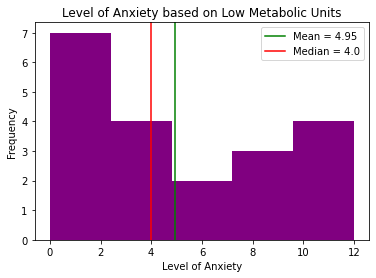

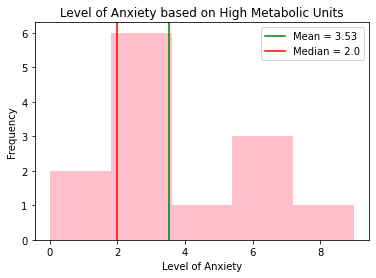

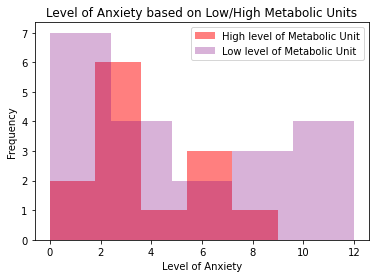

In [9]:
# dataviz

# plotting a histogram
# histogram function: takes into consideration the data to be plotted
# number of bins and color
plt.hist(low_met, bins=5, color='purple')

# create the lines of mean and median on the visualization
# takes into consideration the value where the line should be drawn
plt.axvline(low_mean, color='g', label='Mean = 4.95')
plt.axvline(low_median, color='r', label='Median = 4.0')

# set the position of the legend
plt.legend(loc='upper right')
# x-axis label
plt.xlabel('Level of Anxiety')
# frequency label
plt.ylabel('Frequency')
# plot title
plt.title('Level of Anxiety based on Low Metabolic Units')

# function to show the plot
plt.show()


# plotting a histogram
# histogram function: takes into consideration the data to be plotted
# number of bins and color
plt.hist(high_met, bins=5, color='pink')

# create the lines of mean and median on the visualization
# takes into consideration the value where the line should be drawn
plt.axvline(high_mean, color='g', label = 'Mean = 3.53')
plt.axvline(high_median, color='r', label = 'Median = 2.0')

# set the position of the legend
plt.legend(loc='upper right')
# x-axis label
plt.xlabel('Level of Anxiety')
# frequency label
plt.ylabel('Frequency')
# plot title
plt.title('Level of Anxiety based on High Metabolic Units')

# function to show the plot
plt.show()

# plotting two "merged" histograms
# histogram function: takes into consideration the data to be plotted
# number of bins and color
plt.hist(high_met, bins=5, alpha=0.5, label='High level of Metabolic Unit', color='red')
plt.hist(low_met, bins= 5, alpha=0.3, label='Low level of Metabolic Unit', color='purple')

# set the position of the legend
plt.legend(loc='upper right')
# x-axis label
plt.xlabel('Level of Anxiety')
# frequency label
plt.ylabel('Frequency')
# plot title
plt.title('Level of Anxiety based on Low/High Metabolic Units')

# function to show the plot
plt.show()

In [25]:
# difference of means test
# examine the subgroups

# this code is based on the code presented in class Session X
def difference_of_means_test(data1,data2,tails):
    
    # sample sizes
    n1 = len(data1)
    n2 = len(data2)
    
    # mean of samples
    x1 = np.mean(data1)
    x2 = np.mean(data2)
    
    # stdev of samples (using Bessel’s correction: n-1 on the denominator)
    s1 = np.std(data1,ddof=1) 
    s2 = np.std(data2,ddof=1)
    
    # calculation of standard error using its formula
    SE = np.sqrt(s1**2/n1 + s2**2/n2)
    
    # calculation of t-score using its formula
    Tscore = np.abs((x2 - x1))/SE
    
    # degrees of freedom using the conservative estimate from OpenIntro
    df = min(n1,n2) - 1 
    
    # calculation of the p-value using the sunction from stats library
    # this takes into account how many tails our test has
    # and the fact it is a t-test
    pvalue = tails*stats.t.cdf(-Tscore,df)

    # calculates the pooled stdev -> necessary for Cohen's D calculations
    SDpooled = np.sqrt((s1**2*(n1-1) + s2**2*(n2-1))/(n1+n2-2))
    
    # Cohen's D formula
    Cohensd = (x2 - x1)/SDpooled
    
    # Hedge's g formula for assessment of the effect size
    Hedgeg = Cohensd * (1 - (3 / (4*(n1+n2)-9)))

    # prints
    print('T-score =', Tscore)
    print('SE =', SE)
    print('p =',pvalue)
    print('d =',Cohensd)
    print("Hedge's g =", Hedgeg)

# calling the function
difference_of_means_test(low_met,high_met,1)


T-score = 1.210661393427409
SE = 1.1659234111218872
p = 0.12466547825825111
d = -0.3958456227266493
Hedge's g = -0.3861908514406335


In [11]:
# confidence interval calculations using the formula

# low metabolic data
low_low_bound =  4.95 - (1.78*(4.03/math.sqrt(13)))
low_high_bound = 4.95 + (1.78*(4.03/math.sqrt(13)))

# high metabolic data
high_low_bound = 3.53 - (1.73*(2.66/math.sqrt(20)))
high_high_bound = 3.53 + (1.73*(2.66/math.sqrt(20)))

# prints of bounds
print(low_low_bound, low_high_bound, high_low_bound, high_high_bound)

2.9604568061989704 6.93954319380103 2.5010062381141465 4.558993761885853
